# Yığılmış Grafikler
Tahmini süre: 45 dakika

Bu laboratuvar çalışmasında, özellikle yığılmış grafikler kullanarak verileri görselleştirmeye odaklanacaksınız. Gerekli verileri çıkarmak için SQL sorguları kullanacak ve veriler içindeki bileşimi ve karşılaştırmayı analiz etmek için yığılmış grafikler uygulayacaksınız.

Hedefler
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Yığılmış grafikler kullanarak verilerin bileşimini görselleştirmek.

Yığılmış grafikler kullanarak farklı kategorilerdeki birden fazla değişkeni karşılaştırmak.

Yığılmış grafik görselleştirmelerinde eğilimleri analiz etmek.

***Kurulum: Verilerin İndirilmesi ve Yüklenmesi
Kütüphaneleri yükleyin***


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 106.7 MB/s eta 0:00:00


Öncelikle, veri setini indirin ve bir pandas DataFrame'ine yükleyin.

Adım 1: Veri setini indirin

In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-30 11:32:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.6MB/s    in 2.3s    

2026-01-30 11:32:52 (66.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [3]:

pd.set_option('display.max_columns', None)
df = pd.read_csv("survey-data.csv")
df.head(20)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

# Görev 1: Yaş Gruplarına Göre İş Memnuniyetinin Dağılımı İçin Yığılı Grafik
1. Farklı Yaş Grupları İçin Ortanca JobSatPoints_6 ve JobSatPoints_7 Değerlerinin Yığılı Grafiği
Çeşitli yaş gruplarındaki iş memnuniyeti puanlarının (JobSatPoints_6 ve JobSatPoints_7) dağılımını görselleştirin. Bu, farklı demografik gruplardaki memnuniyet düzeylerinin dağılımını anlamaya yardımcı olacaktır.

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# CSV'yi okuyalım (zaten indirmiştim)
df = pd.read_csv("survey-data.csv")

# Bellekte (RAM) geçici bir SQLite veritabanı oluşturalım ve veriyi içine atalım
conn = sqlite3.connect(':memory:')
df.to_sql('survey_table', conn, index=False, if_exists='replace')

65437

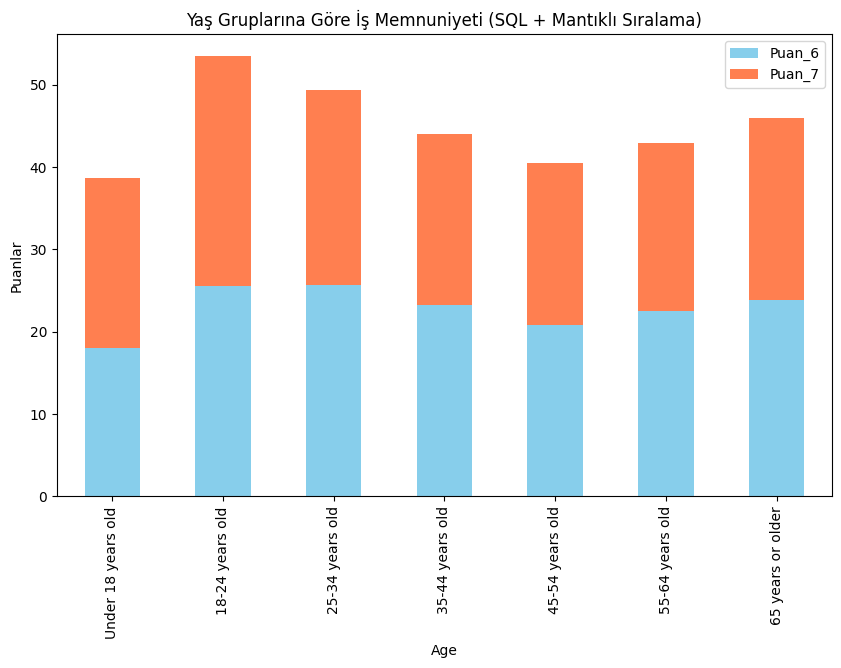

In [5]:

# 2. SQL Sorgusu (Veriyi sade bir şekilde çekiyoruz)
query = "SELECT Age, AVG(JobSatPoints_6) as Puan_6, AVG(JobSatPoints_7) as Puan_7 FROM survey_table GROUP BY Age"
df_sql = pd.read_sql_query(query, conn)

# 3. Sıralama ve Görselleştirme (Tek bir "reindex" ile yaşları düzeltiyoruz)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

df_sql.set_index('Age').reindex(age_order).dropna().plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'coral'])

plt.title('Yaş Gruplarına Göre İş Memnuniyeti (SQL + Mantıklı Sıralama)')
plt.ylabel('Puanlar')
plt.show()


İş Durumuna Göre İş Memnuniyeti Puanları (JobSatPoints_6 ve JobSatPoints_7) Karşılaştırmalı Grafiği
Farklı iş durumlarındaki iş memnuniyetini (JobSatPoints_6 ve JobSatPoints_7) karşılaştırmak için bir yığılı grafik oluşturun. Bu grafik, memnuniyetin iş türüne göre nasıl değiştiğini gösterecektir.


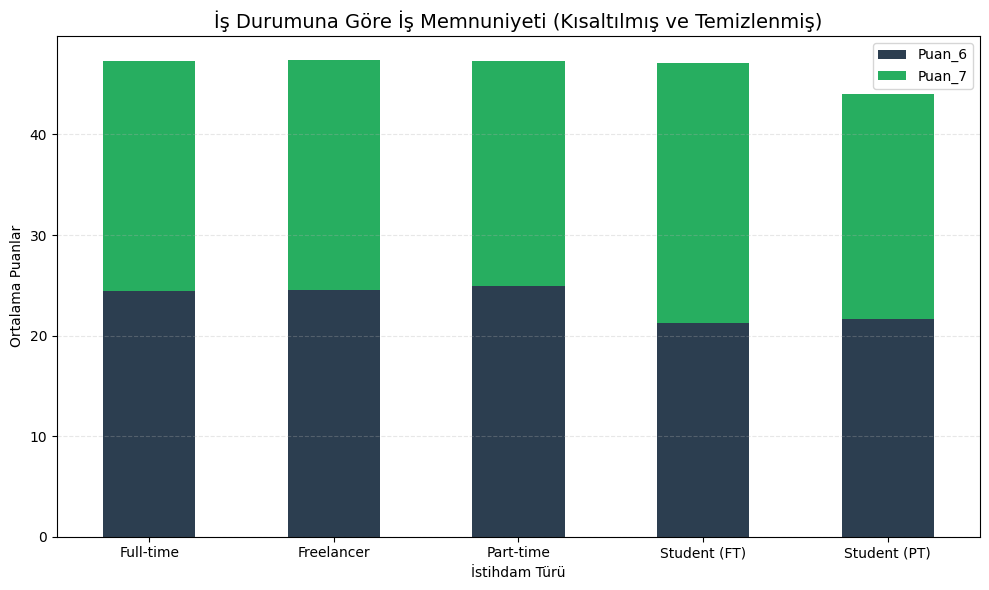

In [7]:
# 1. Veriyi Hazırlama ve Kısaltma
df_clean = df.copy()

# Uzun isimleri kısaltmak için bir sözlük (Mapping) yapalım
short_names = {
    'Employed, full-time': 'Full-time',
    'Independent contractor, freelancer, or self-employed': 'Freelancer',
    'Employed, part-time': 'Part-time',
    'Student, full-time': 'Student (FT)',
    'Student, part-time': 'Student (PT)',
    'Not employed, but looking for work': 'Unemployed (Looking)',
    'I prefer not to say': 'Other'
}

# Önce ayırıyoruz, sonra sözlükle kısaltıyoruz
df_clean['Employment'] = df_clean['Employment'].str.split(';').str[0].map(short_names).fillna(df_clean['Employment'])

# 2. SQL Veritabanına Yükleme
conn = sqlite3.connect(':memory:')
df_clean.to_sql('survey_table', conn, index=False, if_exists='replace')

# 3. SQL Sorgusu (Sadece puanı olanları çekiyoruz ki boş sütun çıkmasın)
query = """
SELECT Employment, 
       AVG(JobSatPoints_6) as Puan_6, 
       AVG(JobSatPoints_7) as Puan_7
FROM survey_table
WHERE Employment IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND JobSatPoints_7 IS NOT NULL
GROUP BY Employment
ORDER BY COUNT(*) DESC
LIMIT 5
"""
df_emp_sql = pd.read_sql_query(query, conn)

# 4. Görselleştirme
if not df_emp_sql.empty:
    df_emp_sql.set_index('Employment').plot(kind='bar', 
                                            stacked=True, 
                                            figsize=(10, 6), 
                                            color=['#2c3e50', '#27ae60'])

    plt.title('İş Durumuna Göre İş Memnuniyeti (Kısaltılmış ve Temizlenmiş)', fontsize=14)
    plt.ylabel('Ortalama Puanlar')
    plt.xlabel('İstihdam Türü')
    plt.xticks(rotation=0) # İsimler kısaldığı için yan çevirmeye gerek kalmadı
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Veri bulunamadı. Lütfen filtreleri kontrol edin.")


# Görev 2: Yaş Gruplarına Göre Ücret ve İş Memnuniyeti için Yığılı Grafik
***Bu yığlı grafik, özellikle 30-35 yaş arası katılımcılar için ücret (ConvertedCompYearly) ve iş memnuniyetinin (JobSatPoints_6) bileşimini görselleştirir.***

memnuniyet puanı grafikte görünmeyecek kadar küçük kalır (bir devin yanındaki karınca gibi).

Bu yüzden analizde Normalizasyon (verileri aynı ölçeğe getirme) yapmamız veya SQL ile orantılı bir çekim yapmamız gerekir. Ayrıca verindeki yaş grupları "30-35" şeklinde değil, "25-34" ve "35-44" şeklinde. Biz 25-44 arasını baz alarak ilerleyelim.

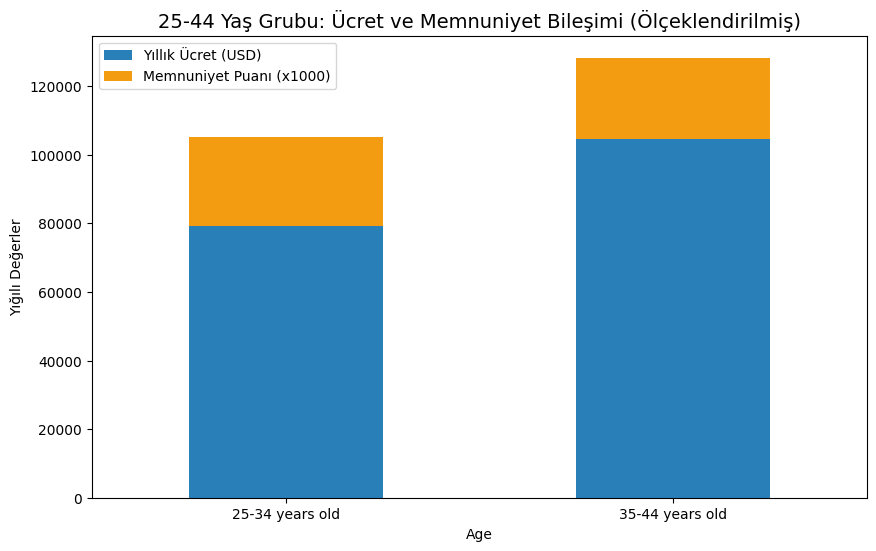

In [11]:
# 2. SQL Sorgusu: 25-44 yaş arası katılımcıları filtreleyelim
# Puanı 1000 ile çarpıyoruz ki maaşın yanında görünür hale gelsin (Ölçekleme)
query_1 = """
SELECT Age, 
       AVG(ConvertedCompYearly) as Ortalama_Maas, 
       AVG(JobSatPoints_6) * 1000 as Memnuniyet_Olceklendirilmis
FROM survey_table
WHERE Age IN ('25-34 years old', '35-44 years old')
  AND ConvertedCompYearly IS NOT NULL
GROUP BY Age
"""
df_3040 = pd.read_sql_query(query_1, conn)

# 3. Görselleştirme
df_3040.set_index('Age').plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2980b9', '#f39c12'])

plt.title('25-44 Yaş Grubu: Ücret ve Memnuniyet Bileşimi (Ölçeklendirilmiş)', fontsize=14)
plt.ylabel('Yığılı Değerler')
plt.legend(['Yıllık Ücret (USD)', 'Memnuniyet Puanı (x1000)'], loc='upper left')
plt.xticks(rotation=0)
plt.show()

***Yaş Gruplarına Göre Ortalama Ücret ve İş Memnuniyeti Grafiği
Farklı yaş gruplarındaki ortalama ücret ve iş memnuniyeti ölçütlerini karşılaştırın. Bu, ücret ve memnuniyet düzeylerinin yaşa göre nasıl farklılık gösterdiğini görselleştirmeye yardımcı olur.***

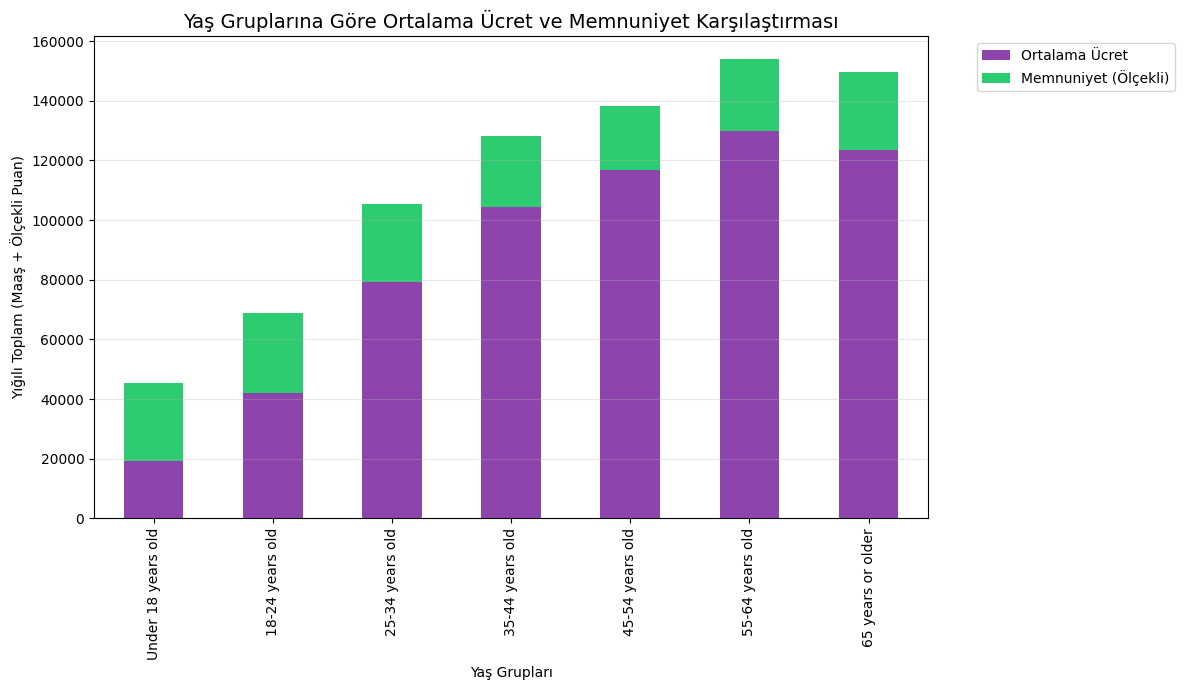

In [12]:
# 1. SQL Sorgusu: Tüm yaş grupları için ortalamalar
query_2 = """
SELECT Age, 
       AVG(ConvertedCompYearly) as Ortalama_Maas, 
       AVG(JobSatPoints_6) * 1000 as Memnuniyet_Puanı
FROM survey_table
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
GROUP BY Age
"""
df_all_ages = pd.read_sql_query(query_2, conn)

# 2. Mantıklı Sıralama
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# 3. Görselleştirme
df_all_ages.set_index('Age').reindex(age_order).dropna().plot(kind='bar', 
                                                             stacked=True, 
                                                             figsize=(12, 7), 
                                                             color=['#8e44ad', '#2ecc71'])

plt.title('Yaş Gruplarına Göre Ortalama Ücret ve Memnuniyet Karşılaştırması', fontsize=14)
plt.ylabel('Yığılı Toplam (Maaş + Ölçekli Puan)')
plt.xlabel('Yaş Grupları')
plt.legend(['Ortalama Ücret', 'Memnuniyet (Ölçekli)'], bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

conn.close()

## Görev 3: Yığılmış Grafikler Kullanarak Verileri Karşılaştırma
***1. Yaş Gruplarına Göre Tercih Edilen Veritabanlarının Yığılmış Grafiği
Farklı yaş gruplarındaki katılımcıların öğrenmek istediği en popüler veritabanlarını görselleştirin. Her veritabanının her yaş grubundaki oranını göstermek için yığılmış bir grafik oluşturun.***


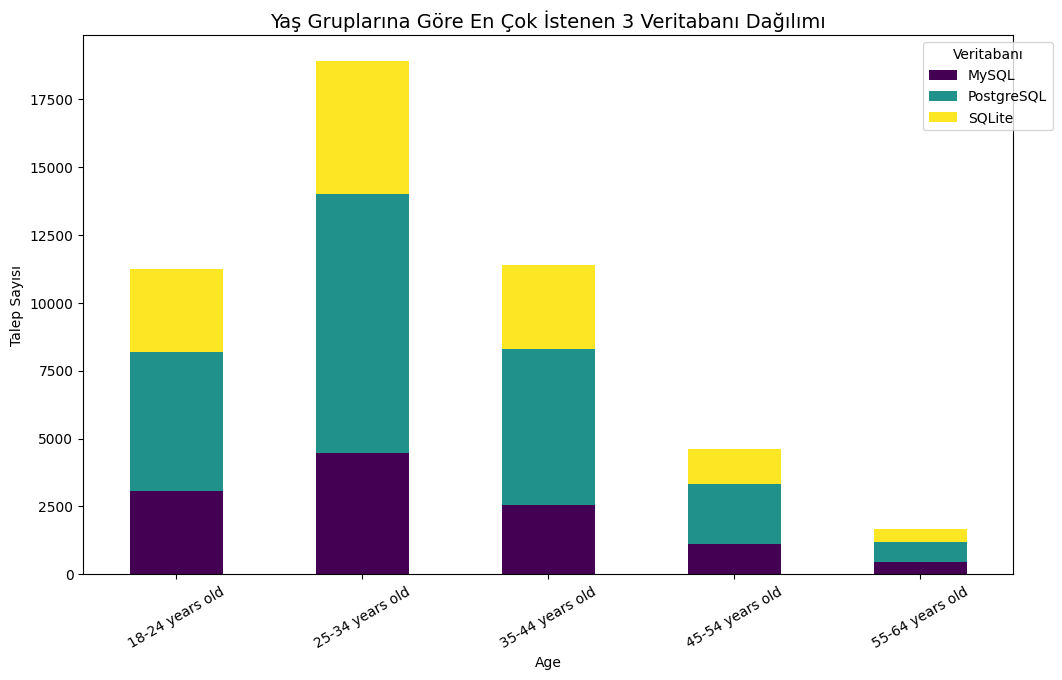

In [15]:
# 1. Veriyi hazırlayalım (DatabaseWantToWorkWith sütununu patlatıyoruz)
df_db = df[['Age', 'DatabaseWantToWorkWith']].dropna()
df_db['Database'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_db.explode('Database')

# 2. Sadece en popüler 3 veritabanını alalım (Grafiğin okunabilir olması için)
top_dbs = df_exploded['Database'].value_counts().nlargest(3).index
df_filtered = df_exploded[df_exploded['Database'].isin(top_dbs)]


query = "SELECT Age, Database, COUNT(*) as Count FROM db_table GROUP BY Age, Database"
df_plot = pd.read_sql_query(query, conn)
pivot_df = df_plot.pivot(index='Age', columns='Database', values='Count').fillna(0)

# Yaş sıralamasını uygula
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']
pivot_df = pivot_df.reindex(age_order).dropna()

# 4. Görselleştirme
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Yaş Gruplarına Göre En Çok İstenen 3 Veritabanı Dağılımı', fontsize=14)
plt.ylabel('Talep Sayısı')
plt.xticks(rotation=30)
plt.legend(title='Veritabanı', bbox_to_anchor=(1.05, 1))
plt.show()

***2. İş Memnuniyetine Göre İstihdam Türlerinin Dağılımı Grafiği
Her iş memnuniyeti düzeyi içindeki istihdam türlerinin dağılımını yığılmış bir grafik kullanarak analiz edin. Bu, istihdam türlerinin çeşitli memnuniyet derecelendirmeleri arasında nasıl dağıldığına dair bilgiler sağlayacaktır.***

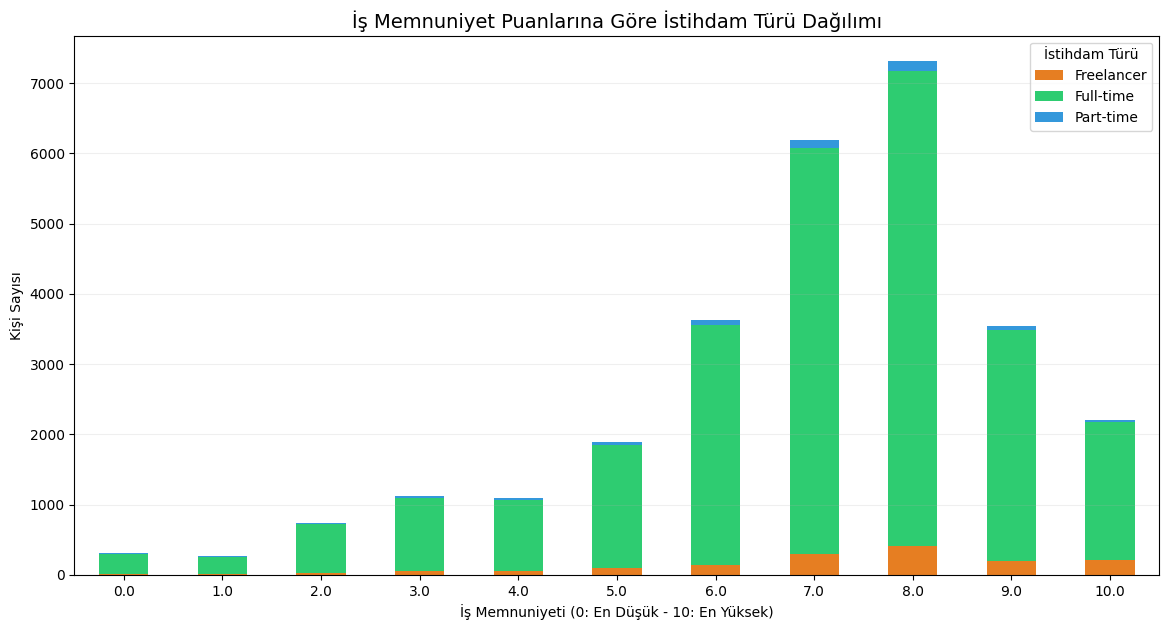

In [16]:
short_names = {
    'Employed, full-time': 'Full-time',
    'Independent contractor, freelancer, or self-employed': 'Freelancer',
    'Employed, part-time': 'Part-time'
}
df['Emp_Short'] = df['Employment'].str.split(';').str[0].map(short_names)

# 2. Puan ve İstihdam verisi olanları alalım
df_sat = df[['JobSat', 'Emp_Short']].dropna()

# 3. SQL Sorgusu ile gruplandıralım
df_sat.to_sql('sat_table', conn, index=False, if_exists='replace')
query_sat = "SELECT JobSat, Emp_Short, COUNT(*) as Count FROM sat_table GROUP BY JobSat, Emp_Short"
df_res = pd.read_sql_query(query_sat, conn)

# 4. Pivot ve Görselleştirme
pivot_sat = df_res.pivot(index='JobSat', columns='Emp_Short', values='Count').fillna(0)
pivot_sat.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#e67e22', '#2ecc71', '#3498db'])

plt.title('İş Memnuniyet Puanlarına Göre İstihdam Türü Dağılımı', fontsize=14)
plt.xlabel('İş Memnuniyeti (0: En Düşük - 10: En Yüksek)')
plt.ylabel('Kişi Sayısı')
plt.legend(title='İstihdam Türü')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.2)
plt.show()

conn.close()

## Görev 4: Yığılmış Grafikler Kullanarak Teknoloji Tercihlerini Keşfetme
***1. Yaş Gruplarına Göre Tercih Edilen Programlama Dilleri için Yığılmış Grafik
Programlama dili tercihlerinin (Beğenilen Dil) LanguageAdmired yaş grupları arasında nasıl değiştiğini analiz edin.**

Language            HTML/CSS  JavaScript  Python   SQL  TypeScript
Age                                                               
18-24 years old         4523        4728    5157  4004        3567
25-34 years old         6937        7936    7431  7516        6696
35-44 years old         4580        5161    4239  5055        3766
45-54 years old         1800        2051    1802  2382        1146
55-64 years old          715         819     741  1028         320
65 years or older        169         170     194   204          38
Prefer not to say         97          85     105    63          41
Under 18 years old      1030         919    1105   440         505


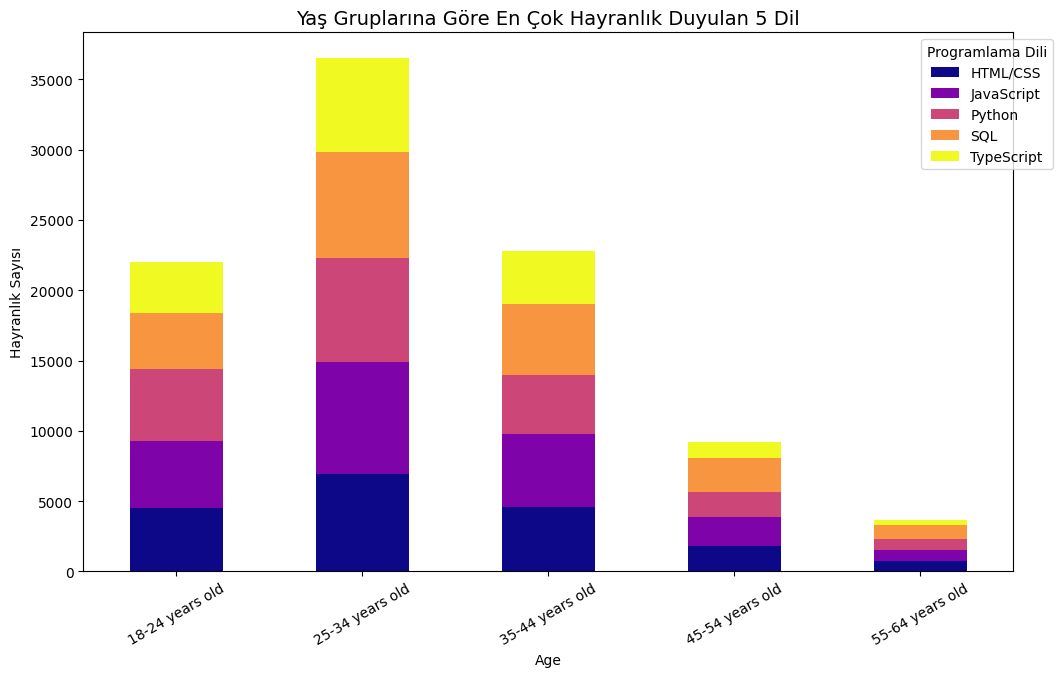

In [19]:
# 1. Veriyi hazırla (LanguageAdmired patlatılıyor)
df_adm = df[['Age', 'LanguageAdmired']].dropna()
df_adm['Language'] = df_adm['LanguageAdmired'].str.split(';')
df_exp_lang = df_adm.explode('Language')

# 2. En beğenilen ilk 5 dili seçelim
top_langs = df_exp_lang['Language'].value_counts().nlargest(5).index
df_filt_lang = df_exp_lang[df_exp_lang['Language'].isin(top_langs)]

# 3. SQL ile Gruplandır ve Pivot Yap
conn = sqlite3.connect(':memory:')
df_filt_lang.to_sql('lang_table', conn, index=False)
query_lang = "SELECT Age, Language, COUNT(*) as Count FROM lang_table GROUP BY Age, Language"
df_res_lang = pd.read_sql_query(query_lang, conn)

pivot_lang = df_res_lang.pivot(index='Age', columns='Language', values='Count').fillna(0)
print(pivot_lang)

# Yaş sıralamasını uygula
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']
pivot_lang = pivot_lang.reindex(age_order).dropna()

# 4. Görselleştirme
pivot_lang.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='plasma')

plt.title('Yaş Gruplarına Göre En Çok Hayranlık Duyulan 5 Dil', fontsize=14)
plt.ylabel('Hayranlık Sayısı')
plt.xticks(rotation=30)
plt.legend(title='Programlama Dili', bbox_to_anchor=(1.05, 1))
plt.show()

***2. İstihdam Türüne Göre Teknoloji Benimseme Grafiği
Beğenilen platformların (PlatformAdmired) istihdam türlerine (örneğin, tam zamanlı, serbest çalışan) göre nasıl farklılık gösterdiğini inceleyin.***

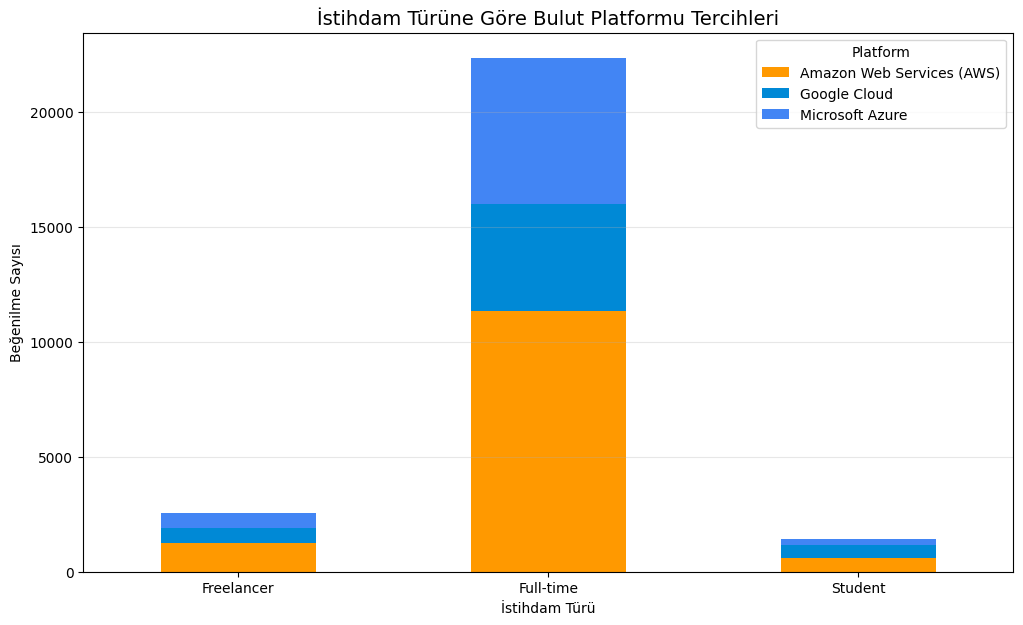

In [20]:
# 1. Veriyi hazırla ve İstihdam isimlerini kısalt
short_names = {
    'Employed, full-time': 'Full-time',
    'Independent contractor, freelancer, or self-employed': 'Freelancer',
    'Student, full-time': 'Student'
}
df['Emp_Short'] = df['Employment'].str.split(';').str[0].map(short_names)

df_plat = df[['Emp_Short', 'PlatformAdmired']].dropna()
df_plat['Platform'] = df_plat['PlatformAdmired'].str.split(';')
df_exp_plat = df_plat.explode('Platform')

# 2. En popüler 3 platformu alalım (AWS, Azure, Google Cloud)
top_plats = df_exp_plat['Platform'].value_counts().nlargest(3).index
df_filt_plat = df_exp_plat[df_exp_plat['Platform'].isin(top_plats)]

# 3. SQL ve Pivot
df_filt_plat.to_sql('plat_table', conn, index=False, if_exists='replace')
query_plat = "SELECT Emp_Short, Platform, COUNT(*) as Count FROM plat_table GROUP BY Emp_Short, Platform"
df_res_plat = pd.read_sql_query(query_plat, conn)

pivot_plat = df_res_plat.pivot(index='Emp_Short', columns='Platform', values='Count').fillna(0)

# 4. Görselleştirme
pivot_plat.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#FF9900', '#0089D6', '#4285F4']) # AWS-Azure-GCP renkleri

plt.title('İstihdam Türüne Göre Bulut Platformu Tercihleri', fontsize=14)
plt.xlabel('İstihdam Türü')
plt.ylabel('Beğenilme Sayısı')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.grid(axis='y', alpha=0.3)
plt.show()

conn.close()